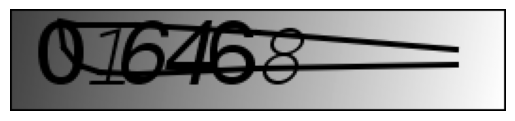

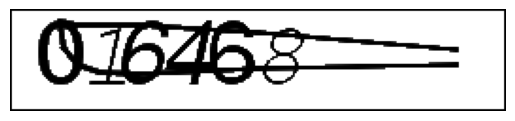

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 이미지 로드
image_path = r"C:\python\captchaCracker\captcha_data\kshop\0\images\pred\016468.png"
ori_image = tf.io.read_file(image_path)
ori_image = tf.io.decode_png(ori_image, channels=1)
image_height = ori_image.shape[0]
image_width = ori_image.shape[1]

image = tf.image.convert_image_dtype(ori_image, tf.float32)
# image = tf.image.resize(image, [image_height, image_width])

# # 대비 조정
# image = tf.image.adjust_contrast(image, 1.5)
# # 노이즈 제거 (선택적으로 적용)
# image = tf.image.per_image_standardization(image)

threshold = 60

if threshold > 0:
    image = tf.where(ori_image > threshold, 255, ori_image)

# image = tf.transpose(image, perm=[1, 0, 2])

plt.imshow(ori_image.numpy())  # TensorFlow 텐서를 NumPy 배열로 변환하여 표시
plt.axis("off")  # 축 제거
plt.gray()  # 그레이스케일로 표시
plt.show()

# 이미지 출력
plt.imshow(image.numpy())  # TensorFlow 텐서를 NumPy 배열로 변환하여 표시
plt.gray()  # 그레이스케일로 표시
plt.axis("off")  # 축 제거
plt.show()


In [1]:
import os, time
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import requests
import shutil

from cc.Core import Model, get_captcha_type_list

# 다운로드할 이미지 URL
image_url = "https://seller.kshop.co.kr/jwork/authentication/viewCaptcha.do?W=263&H=54&F=50"
# 저장할 파일 이름 설정 (경로 포함 가능)
save_dir = os.path.abspath('temp')

captcha_id = 'kshop'

captcha_type_list = get_captcha_type_list()
train_data = captcha_type_list[captcha_id].train_data
# train_data.image_height = 51
# train_data.image_width = 138
model = Model(train_data=train_data, weights_only=False)
pred_dir = train_data.get_image_dir(train=False)
os.makedirs(pred_dir, exist_ok=True)

count = 2

for i in range(count):
    # 이미지 다운로드 요청
    response = requests.get(image_url, stream=True)
    response.raise_for_status() # 요청 실패 시 예외 발생

    timestamp = int(time.time() * 1000)
    filename = f"{timestamp}.png"
    save_path = os.path.join(save_dir, filename)
    os.makedirs(save_dir, exist_ok=True)  # 디렉토리가 없으면 생성
    # 파일로 저장
    with open(save_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    pred, confidence = model.predict(save_path)
    target_path = os.path.join(pred_dir, pred + ".png")
    shutil.copy(save_path, target_path)

    print(f"이미지가 성공적으로 다운로드되었습니다: {os.path.abspath(target_path)}")
    time.sleep(0.5)  # 0.25초 대기

print("모든 이미지 다운로드 및 예측이 완료되었습니다.")


weights_path :  c:\python\captchaCracker\captcha_data\kshop\0\model\weights.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
이미지가 성공적으로 다운로드되었습니다: c:\python\captchaCracker\captcha_data\kshop\0\images\pred\414275.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
이미지가 성공적으로 다운로드되었습니다: c:\python\captchaCracker\captcha_data\kshop\0\images\pred\383079.png
모든 이미지 다운로드 및 예측이 완료되었습니다.


In [19]:
import os, glob
import shutil
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from cc.Core import Model, get_captcha_type_list

captcha_id = 'gov24'
captcha_type_list = get_captcha_type_list()
train_data = captcha_type_list[captcha_id].train_data
model = Model(train_data=train_data, weights_only=False)
pred_img_path_list = glob.glob(os.path.join(save_dir, '*.png'))
pred_dir = os.path.join(save_dir, 'pred')
os.makedirs(pred_dir, exist_ok=True)

for src_img_path in pred_img_path_list:
    pred, confidence = model.predict(src_img_path)
    target_path = os.path.join(pred_dir, pred + ".png")
    shutil.copy(src_img_path, target_path)
       
print("Done!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━